## Classfication metrics
### the most common used are:
* Accuracy
* Precision
* Recall
* F1 score
* AUC: Area under the ROC curve
* Log loss
* Precision at k
* Average precision at k
* Mean average precison at k

Let's define some of the metrics and when to use them
## accuracy
Accuracy is a general metric used when the target variable in the classification is NOT skewed, in other words, the proportion of the different outcomes is similar. 

Example, in a binary output, 50% of the values are 0 and 50% are 1.

In [141]:
def accuracy(y_true, y_pred):
    """
    Compute accuracy from
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    #initialise counter of well predicted values
    counter = 0
    # loop through each value
    for y_t, y_p in zip(y_true,y_pred):
        # when values are the same increase the counter
        if y_t==y_p:
            counter+=1
    # accuracy is define as the true cases divided by the total number of cases
    return counter/len(y_true)

In [142]:
true_values = [0,1,1,1,0,0,0,1]
pred_values = [0,1,0,1,0,1,0,0]

In [143]:
accuracy(y_true = true_values,y_pred = pred_values)

0.625

In [144]:
# most metrics already exists in scikit-learn library
from sklearn import metrics
metrics.accuracy_score(y_true= true_values,y_pred = pred_values)

0.625

In [145]:
# when the proportion of the outcome is skewed a simple model may have high accuracy
true_values = [0,1,0,0,0,0,0,0,0,0]
pred_values = [0,1,0,0,0,0,0,1,0,0]

accuracy(y_true = true_values,y_pred = pred_values)

0.9

Therefore we need to go deeper and analyse the right metrics.For this it's normal to use a conditional probability metric where we define True or False (correct or incorrect prediction) based on the actual target: Positive or Negative (for binary or non-binary target).

## True-False and Positive-Negative
For a binary target variable A, B.
* True Positive (TP): Predicted A, Observed A. 
* True Negative (TN): Predicted B, Observed B.

* False Positive (FP): Predicted A, Observed B.
* False Negative (FN): Predicted B, Observed A.

Code implementation for binary target:

In [146]:
def true_positive(y_true,y_pred):
    """
    Funtion to compute True Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialise
    counter = 0
    # counter the number of 1 when both predicted and values are the same
    for yt, yp in zip(y_true,y_pred):
        if yt==1 and yp==1:
            counter+=1
    return counter

def true_negative(y_true,y_pred):
    """
    Funtion to compute True Negative
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialise
    counter = 0
    # counter the number of 0 when both predicted and values are the same
    for yt, yp in zip(y_true,y_pred):
        if yt==0 and yp==0:
            counter+=1
    return counter

def false_positive(y_true,y_pred):
    """
    Funtion to compute False Positive
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialise
    counter = 0
    # counter the number of predicted=1 and observed=0
    for yt, yp in zip(y_true,y_pred):
        if yt==0 and yp==1:
            counter+=1
    return counter

def false_negative(y_true,y_pred):
    """
    Funtion to compute False Negative
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialise
    counter = 0
    # counter the number of predicted=0 and observed=1
    for yt, yp in zip(y_true,y_pred):
        if yt==1 and yp==0:
            counter+=1
    return counter


In [147]:
# let's compute the TF-NP for the example variables
true_positive(true_values, pred_values)

1

In [148]:
true_negative(true_values, pred_values)

8

In [149]:
false_positive(true_values, pred_values)

1

In [150]:
false_negative(true_values, pred_values)

0

## metrics based in True-False Positive-Negative
### Accuracy = (true values)/(total count)= (TP+TN)/(TP+TN+FP+FN)

In [151]:
def accuracy_(y_true,y_pred):
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    return (tp+tn)/(tp+tn+fp+fn)

#example
accuracy_(true_values,pred_values)

0.9

### Precision = (true positives)/positives TP/(TP+FP)

In [152]:
def precision(y_true, y_pred):
    tp = true_positive(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    
    return tp/(tp+fp)
#example
precision(true_values,pred_values)

0.5

### Recall = TP/(TP+FN)

In [153]:
def recall(y_true, y_pred):
    tp = true_positive(y_true,y_pred)
    fn = false_negative(y_true,y_pred)
    
    return tp/(tp+fn)
#example
recall(true_values,pred_values)

1.0

F1-score is the harmonic mean of recall and precision
### F1-score =  2 precision * recall / (precision+recall)
### F1-score =  2TP/(2TP+FP+FN)

In [154]:
def f1(y_true,y_pred):
    p = precision(y_true,y_pred)
    r = recall(y_true,y_pred)
    
    return 2*p*r/(r+p)
#example
f1(true_values,pred_values)

0.6666666666666666

## other useful metrics
### True positive rate = recall, sensitivity. TPR = TP/(TP+FN)

### False positive rate. FPR= TN/(TN+FP)

In [155]:
def tpr(y_true,y_pred):
    return recall(y_true,y_pred)

def fpr(y_true,y_pred):
    tn = true_negative(y_true,y_pred)
    fp = false_positive(y_true,y_pred)
    return fp/(tn+fp)

## Metrics when target is probability of being Positive
we need to define a threshold (normally 0.5) to assign when is positive


In [203]:
# actual values
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]

# predicted probabilities of being 1
y_pred = [0.1,0.3,0.2,0.6,0.8,0.05,0.9,0.5,0.3,0.66,0.3,0.2,0.85,0.15,0.99]

# threshold
thresholds = [.01,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,.99]

tpr_list = []
fpr_list = []
precision_list = []
recall_list=[]

# change prediction (positive depending on the threshold)
for t in thresholds:
    #prediction of positives
    temp_pred = [1 if x >= t else 0 for x in y_pred ]
    #print(temp_pred)
    # TEMPORAL METRICS
    # true positive rate 
    temp_tpr = tpr(y_true,temp_pred)
    # false positive rate
    temp_fpr = fpr(y_true,temp_pred)
    
    #precision
    temp_precision = precision(y_true,temp_pred)
    #recall
    temp_recall = recall(y_true,temp_pred)
    
    
    #save the metrics
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)
    
    precision_list.append(temp_precision)
    recall_list.append(temp_recall)
    
    

### precision-recall curve

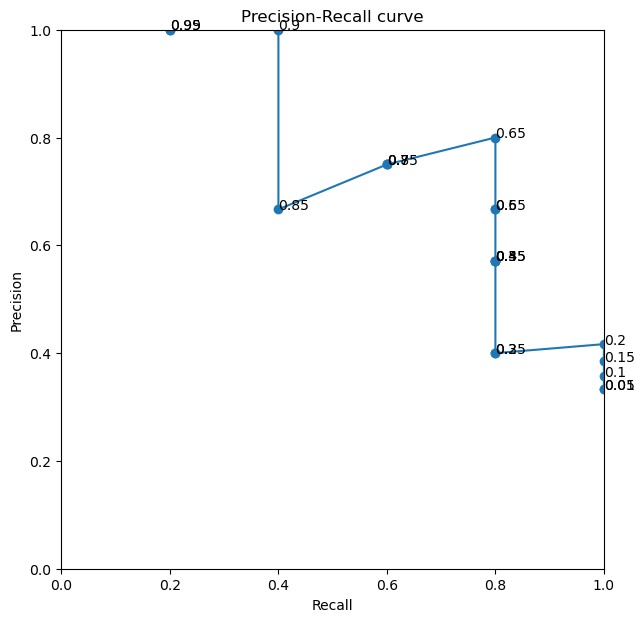

In [209]:
# precision-recall curve
plt.figure(figsize = (7,7))
plt.plot(recall_list,precision_list)

plt.scatter(recall_list,precision_list,label = 'threshold')

for t, txt in enumerate(thresholds):
    plt.annotate(txt, (recall_list[t], precision_list[t]))

plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### ROC curve

In [218]:
import pandas as pd
df_roc = pd.DataFrame()
df_roc['tpr'] = tpr_list
df_roc['fpr'] = fpr_list
df_roc['threshold'] = thresholds

df_roc

,tpr,fpr,threshold
0,1.0,1.0,0.01
1,1.0,1.0,0.05
2,1.0,0.9,0.10
3,1.0,0.8,0.15
4,1.0,0.7,0.20
5,0.8,0.6,0.25
6,0.8,0.6,0.30
7,0.8,0.3,0.35
8,0.8,0.3,0.40
9,0.8,0.3,0.45


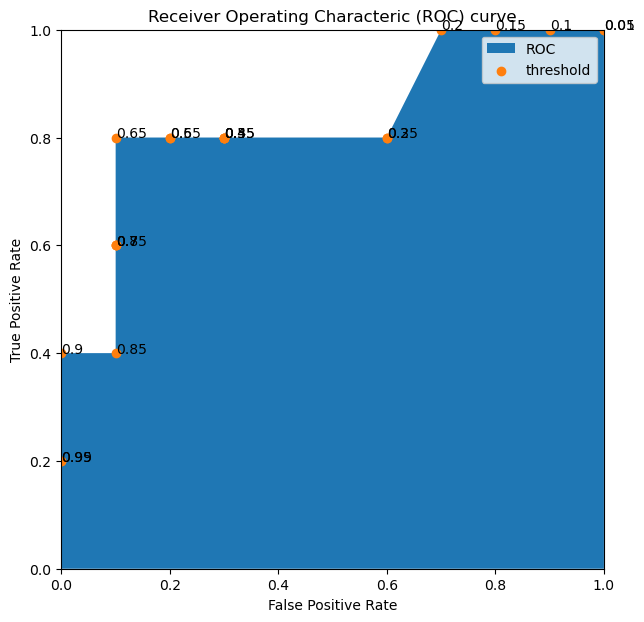

In [207]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,7))
plt.fill_between(fpr_list,tpr_list,label = 'ROC')
plt.scatter(fpr_list,tpr_list,label = 'threshold')

for t, txt in enumerate(thresholds):
    plt.annotate(txt, (fpr_list[t], tpr_list[t]))
    
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteric (ROC) curve')
plt.show()

### Area Under the ROC curve (AUC)

In [220]:
from sklearn import metrics
metrics.roc_auc_score(y_true,y_pred)

0.8300000000000001

AUC range from 0 to 1:

* AUC = 1. Perfect model. For real data, normally means there was a error in the validation.
* AUC = 0. very bad model for Positive (or very good for Negative). problem with validation or data processing.
* AUC = 0.5. Prediction are random (for binary target).
AUC between (0,0.5) are worse than random (for binary target)

ROC curve helps to choose a threshold for the "false positive vs true positive" trade-off. In this case if you want to minimise the False positive (x to the left) and maximise the True positive (y upwards).

For the example, the chosen threshold should be 0.65 (up-left corner of ROC).

## logarithmic loss or log loss

For a binary classification target the log loss is defined as follows

* Log Loss = -1*(target * log(prob_prediction) + (1-target) * log(1-prob_prediction))

target is either 0 or 1

prob_prediction is the probability of a sample to being "1".

Implementation requires to convert 0 into 1e-15 to avoid error in log.


In [223]:
metrics.log_loss(y_true,y_pred)

0.49882711861432294

Log loss will penalise hard on non confident predictions. 

## multi-class classification

In [259]:
y_true_multi = [0,1,2,0,1,2,0,0,2]
y_pred_multi = [0,0,2,0,1,2,2,1,2]

* macro averaged precision: compute precision by class then average all.

In [260]:
metrics.precision_score(y_true_multi,y_pred_multi,average = "macro")

0.6388888888888888

* micro averaged precision: accumulative true positive and false positive by class, then precision = tp/(tp+fp)

In [261]:
metrics.precision_score(y_true_multi,y_pred_multi,average = "micro")

0.6666666666666666

* weighted averaged precision: accumulative true positive and false positive by class, then precision = tp/(tp+fp), weight by the number of samples in each class.


In [263]:
metrics.precision_score(y_true_multi,y_pred_multi,average = "weighted")

0.6574074074074073

## confusion matrix
This matrix help to summarise all the predicted vs actual targets results.


In [271]:
y_true = [0,1,2,0,1,2,0,2,2]
y_pred = [0,2,1,0,2,1,0,0,2]

# confusion matrix from scikit learn
cm = metrics.confusion_matrix(y_true,y_pred)
cm

array([[3, 0, 0],
       [0, 0, 2],
       [1, 2, 1]])

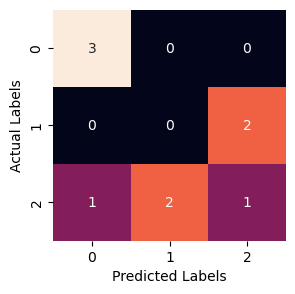

In [277]:
import seaborn as sns
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True,cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

